In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from subprocess import call
from os import system
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading the Data

In [54]:
df = pd.read_csv('train.csv')
df_t = pd.read_csv('test.csv')
df_s = pd.read_csv('test.csv')

## Preprocessing

In [55]:
#df.set_index('PassengerId',inplace=True) 
#df_t.set_index('PassengerId',inplace=True) 
df.drop(columns=['PassengerId'],inplace=True)
df_t.drop(columns=['PassengerId'],inplace=True)

In [56]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df_t.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Handling Missing Values

In [58]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [59]:
df_t.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [60]:
df.drop(columns=['Cabin','Name','Ticket','SibSp','Parch'],inplace=True)
df_t.drop(columns=['Cabin','Name','Ticket','SibSp','Parch'],inplace=True)

In [61]:
df['Age'] = df['Age'].fillna(df.mean()['Age'])
df_t['Age'] = df_t['Age'].fillna(df_t.mean()['Age'])

In [62]:
df['Embarked'] = df['Embarked'].fillna(value = df.mode()['Embarked'][0])
# .mode() returns a series object, to access its 1st element use -> df.mode()['Embarked'][0]

In [63]:
df_t['Fare'] = df_t['Fare'].fillna(df_t.mean()['Fare'])

In [64]:
df_t.isna().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

## Splitting into Train & Test

In [194]:
y_train = df.iloc[:,0]
x_train = df.drop(columns=['Survived']) 

In [195]:
x_test = df_t

## Handling Categorical Variables

In [196]:
# Categorical boolean mask
categorical_feature_mask = x_train.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = x_train.columns[categorical_feature_mask].tolist()
#categorical_cols

le = LabelEncoder()
x_train[categorical_cols] = x_train[categorical_cols].apply(lambda col: le.fit_transform(col))
x_train[categorical_cols].head(10)

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2
5,1,1
6,1,2
7,1,2
8,0,2
9,0,0


In [197]:
x_test[categorical_cols] = x_test[categorical_cols].apply(lambda col: le.fit_transform(col))
x_test[categorical_cols].head(10)

,Sex,Embarked
0,1,1
1,0,2
2,1,1
3,1,2
4,0,2
5,1,2
6,0,1
7,1,2
8,0,0
9,1,2


In [198]:
x_train.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,22.0,7.2500,2
1,1,0,38.0,71.2833,0
2,3,0,26.0,7.9250,2
3,1,0,35.0,53.1000,2
4,3,1,35.0,8.0500,2


In [199]:
x_test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,0.334993,-0.498407,1
1,3,0,1.325530,-0.513274,2
2,2,1,2.514175,-0.465088,1
3,3,1,-0.259330,-0.483466,2
4,3,0,-0.655545,-0.418471,2


## Implementing Logistic Regression

In [200]:
logit_model = sm.Logit(y_train,x_train)
res = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.503898
         Iterations 6


In [201]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Mon, 26 Aug 2019   Pseudo R-squ.:                  0.2433
Time:                        23:13:24   Log-Likelihood:                -448.97
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.953e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.0525      0.073     -0.720      0.472      -0.195       0.090
Sex           -2.1494      0.169    -12.699      0.000      -2.481      -1.818
Age            0.0100      0.005      1.849      0.0

In [202]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [203]:
acc_log = round(clf.score(x_train, y_train) * 100, 2)
acc_log

79.8

## Implementing Decision Tree (w/o PCA)

In [204]:
dt_e = DecisionTreeClassifier(criterion='entropy',min_samples_split=20)
dt_e.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [205]:
acc_decision_tree = round(dt_e.score(x_train,y_train) * 100, 2)
acc_decision_tree

89.79

## Random Forest

In [206]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [207]:
acc_rf = round(rf_p.score(x_train, y_train) * 100, 2)
acc_rf

-66.62

## Scaling the Feature Variables

#### M-1 

In [208]:
# numeric mask
numeric_feature_mask = x_train.dtypes==float
# filter numeric columns using mask and turn it into a list
numeric_cols = x_train.columns[numeric_feature_mask].tolist()

sc = StandardScaler()
x_train[numeric_cols] =  sc.fit_transform(x_train[numeric_cols])
x_train[numeric_cols].head(10)


,Age,Fare
0,-0.592481,-0.502445
1,0.638789,0.786845
2,-0.284663,-0.488854
3,0.407926,0.420730
4,0.407926,-0.486337
5,0.000000,-0.478116
6,1.870059,0.395814
7,-2.131568,-0.224083
8,-0.207709,-0.424256
9,-1.208115,-0.042956


In [209]:
# numeric mask
numeric_feature_mask = x_test.dtypes==float
# filter numeric columns using mask and turn it into a list
numeric_cols = x_test.columns[numeric_feature_mask].tolist()

sc = StandardScaler()
x_test[numeric_cols] =  sc.fit_transform(x_test[numeric_cols])
x_test[numeric_cols].head(10)


,Age,Fare
0,0.334993,-0.498407
1,1.325530,-0.513274
2,2.514175,-0.465088
3,-0.259330,-0.483466
4,-0.655545,-0.418471
5,-1.289489,-0.473381
6,-0.021601,-0.501993
7,-0.338573,-0.118823
8,-0.972517,-0.509165
9,-0.734788,-0.205781


#### M-2

In [143]:
cols = ['Pclass', 'Sex', 'Embarked', 'Age', 'Fare' ]
x_train = x_train[cols]

sc = StandardScaler()
x_train.iloc[:,3:] = sc.fit_transform(x_train.iloc[:,3:])

## PCA

In [210]:
pca = PCA(.95)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [211]:
print(pca.explained_variance_ratio_) 

[0.42446954 0.26663831 0.15908843 0.09000632 0.05979741]


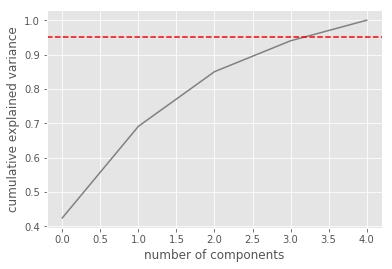

In [212]:
plt.style.use('ggplot')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='grey')
plt.axhline(y=0.95,color='r',linestyle = '--',lw=1.5)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [213]:
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

## Logistic with PCA

In [214]:
clf_p = LogisticRegression()
clf_p.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [215]:
acc_log_pca = round(clf_p.score(x_train, y_train) * 100, 2)
acc_log_pca

79.01

## Decision Tree With PCA

In [216]:
dt_e_p = DecisionTreeClassifier(criterion='entropy',min_samples_split=20)
dt_e_p.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [217]:
acc_decision_tree_pca = round(dt_e_p.score(x_train, y_train) * 100, 2)
acc_decision_tree_pca

90.12

## Random Forest with PCA

In [218]:
rf_p = RandomForestRegressor(n_estimators=100,random_state=42)
rf_p.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [219]:
acc_rf_pca = round(rf_p.score(x_train, y_train) * 100, 2)
acc_rf_pca

87.75